In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Slider, RadioButtons , Button ,TextBox

In [12]:
import seaborn as sns

In [13]:
sns.set()

In [14]:
x1 = np.linspace(0.2,0.2,145)
y1 = np.linspace(0.7,0.41,145)
x2 = np.linspace(0.12,0.5,190) 
y2 = np.linspace(0.286,0.286,190)
x3 = np.linspace(0.5,0.45,25)
y3 = np.linspace(0.554,0.554,25)
theta1 = np.linspace(-0.56*np.pi,np.pi,245)
theta2 = np.linspace(np.pi*0.5,np.pi*1.5,120)
theta3 = np.linspace(np.pi*-0.5,np.pi*0.5,100)
theta4 = np.linspace(np.pi*-0.5,np.pi*-2,130)
x = np.concatenate((x1,np.cos(theta1)/10+0.22,np.cos(theta2)/13+0.12,x2,np.cos(theta3)/15+0.5,x3,np.cos(theta4)/18+0.45),axis=0)
y= np.concatenate((y1,np.sin(theta1)/5+0.6,np.sin(theta2)/6.5+0.44,y2,np.sin(theta3)/7.5+0.42,y3,np.sin(theta4)/9+0.665),axis=0)

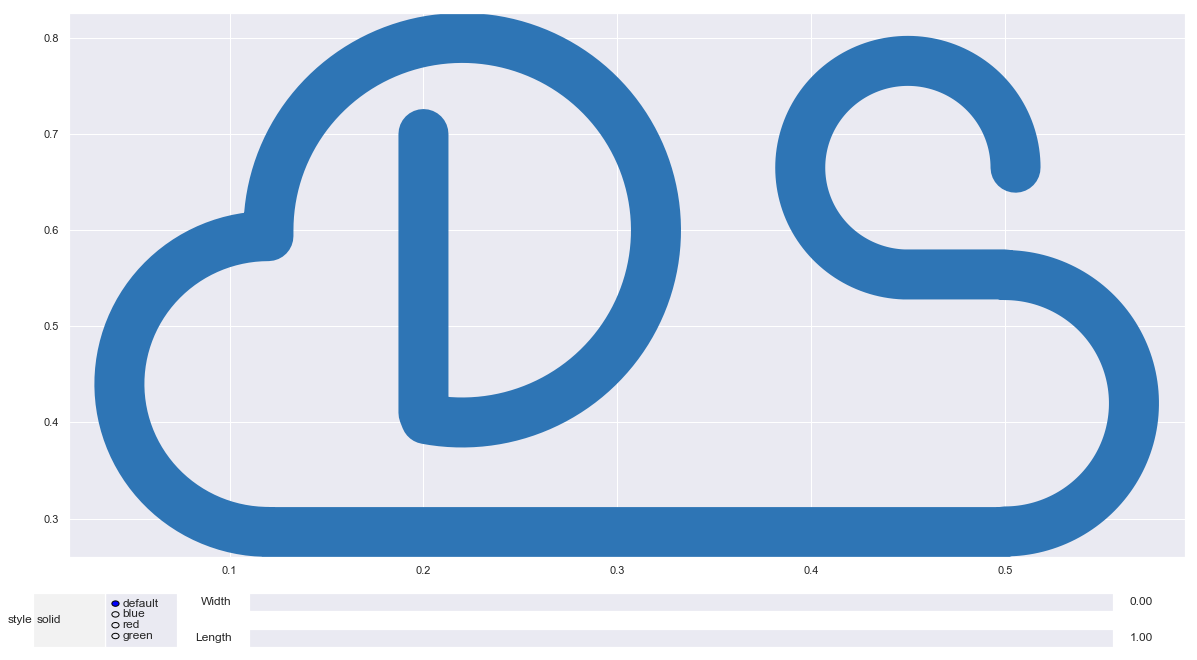

In [17]:
#1.베이스 플랏 형성
fig = plt.figure(figsize=(20,10))
line, = plt.plot(x,y,linewidth=50,color=(46/255,117/255,181/255))

#2.위젯 좌표 지정
ax_c = plt.axes([0.15,0,0.05,0.075])
ax_w = plt.axes([0.25,0.05,0.6,0.025])
ax_d = plt.axes([0.25,0,0.6,0.025])

#3.위젯 모양, 범주 형성
color = RadioButtons(ax_c,['default','blue','red','green'],active=0)
width = Slider(ax_w,'Width',0,50,valinit=0)
data = Slider(ax_d,'Length',1,1000,valinit=1)

#4.위젯 연동함수 지정
def upcol(label) :
    if label == 'default' : line.set_color((46/255,117/255,181/255))
    else :line.set_color(label)
     #1개만 지정시 자료전체가 그색으로 변화
     #자료 개수만큼 지정시 자료에 1:1로 대응하여 색이 변화
    fig.canvas.draw_idle()
#5.위젯과 연동함수 연결
color.on_clicked(upcol)


#4.위젯 연동함수 지정
def upwid(val) :
    line.set_linewidth(val)
    fig.canvas.draw_idle()
#5.위젯과 연동함수 연결
width.on_changed(upwid)


#4.위젯 연동함수 지정
def updata(i) :
    k = int(np.min([i,954]))
    line.set_xdata(x[:k])
    line.set_ydata(y[:k])
    fig.canvas.draw_idle()
#5.위젯과 연동함수 연결
data.on_changed(updata)

#6. 번외

#'-' or 'solid'
#solid linedef submit(text):
    ydata = eval(text)
    line.set_linestyle(ydata)
    fig.canvas.draw_idle()

axbox = plt.axes([0.10,0,0.05,0.075])
text_box = TextBox(axbox, 'style', initial='solid')
text_box.on_submit(submit)

#'--' or 'dashed'
#dashed line
#'-.' or 'dashdot'
#dash-dotted line
#':' or 'dotted'
#dotted line


plt.show()